In [2]:
from data_preprocessing.DataLoader import DataLoader
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import pandas as pd
import datetime as dt
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from data_preprocessing.DataLoader import DataLoader
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
def unite_sets(deliveries, products, sessions, users):
    deliveries["deltas"] = deliveries["delivery_timestamp"] - deliveries["purchase_timestamp"]

    # divide category
    categories = products.category_path.str.split(';', expand=True)
    products = pd.concat([products, categories], axis=1)
    products = products.drop(columns=['category_path'])
    products = products.rename(
        columns={0: "primary_category", 1: "secondary_category", 2: "tertiary_category", 3: "quaternary_category"})


    deliveries_sessions = pd.merge(deliveries, sessions, left_on="purchase_id", right_on="purchase_id")
    deliveries_sessions_users = pd.merge(deliveries_sessions, users, left_on="user_id", right_on="user_id")
    deliveries_sessions_users_products = pd.merge(deliveries_sessions_users, products, left_on="product_id", right_on="product_id")

    deliveries_sessions_users_products.to_csv('../out.csv')
    return deliveries_sessions_users_products

In [7]:
d = DataLoader.load_data_from_path("newData")

products = d.products
deliveries = d.deliveries
sessions = d.sessions
users = d.users

unitated = unite_sets(deliveries, products, sessions, users)

# nie wnosi zadnej informacji wiec wyrzucamy daną kolumnę
unitated = unitated.loc[:, unitated.columns != 'event_type']
unitated = unitated.loc[:, unitated.columns != 'name']
unitated = unitated.loc[:, unitated.columns != 'street']
unitated = unitated.loc[:, unitated.columns != 'product_name']
unitated = unitated.loc[:, unitated.columns != 'delivery_timestamp']
unitated = unitated.loc[:, unitated.columns != 'purchase_timestamp']
unitated = unitated.loc[:, unitated.columns != 'timestamp']
unitated = unitated.loc[:, unitated.columns != 'purchase_id']
unitated = unitated.loc[:, unitated.columns != 'product_id']
unitated = unitated.loc[:, unitated.columns != 'user_id']
unitated = unitated.loc[:, unitated.columns != 'session_id']



# unitated['purchase_timestamp'] = pd.to_datetime(unitated['purchase_timestamp'])
# unitated['purchase_timestamp'] = unitated['purchase_timestamp'].map(dt.datetime.toordinal)
#
# unitated['delivery_timestamp'] = pd.to_datetime(unitated['delivery_timestamp'])
# unitated['delivery_timestamp'] = unitated['delivery_timestamp'].map(dt.datetime.toordinal)
#
# unitated['timestamp'] = pd.to_datetime(unitated['timestamp'])
# unitated['timestamp'] = unitated['timestamp'].map(dt.datetime.toordinal)


# train['deltas'] = pd.to_datetime(train['deltas'])
# train['deltas'] = train['deltas'].map(dt.datetime.toordinal)

# tworzenie one hot encoding dla kolumny city
y = pd.get_dummies(unitated.city, prefix='city')
unitated = unitated.join(other=y)
unitated = unitated.loc[:, unitated.columns != 'city']

y = pd.get_dummies(unitated.primary_category, prefix='primary_category')
unitated = unitated.join(other=y)
unitated = unitated.loc[:, unitated.columns != 'primary_category']

y = pd.get_dummies(unitated.secondary_category, prefix='secondary_category')
unitated = unitated.join(other=y)
unitated = unitated.loc[:, unitated.columns != 'secondary_category']

y = pd.get_dummies(unitated.tertiary_category, prefix='tertiary_category')
unitated = unitated.join(other=y)
unitated = unitated.loc[:, unitated.columns != 'tertiary_category']

y = pd.get_dummies(unitated.quaternary_category, prefix='quaternary_category')
unitated = unitated.join(other=y)
unitated = unitated.loc[:, unitated.columns != 'quaternary_category']

y = pd.get_dummies(unitated.delivery_company, prefix='delivery_company')
unitated = unitated.join(other=y)
unitated = unitated.loc[:, unitated.columns != 'delivery_company']

unitated['deltas'] = pd.to_numeric(unitated['deltas'].dt.seconds, downcast='integer')


# normalizacja deltas
# unitated['deltas'] = unitated['deltas'] /unitated['deltas'].abs().max()


train, test = train_test_split(unitated, test_size=0.2)
X_train = train.loc[:, train.columns != 'deltas']
y_train = train['deltas']

X_test = test.loc[:, test.columns != 'deltas']
y_test = test['deltas']


regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f'
% mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
% r2_score(y_test, y_pred))

Coefficients: 
 [-4.70502630e+01 -9.71171379e-01 -1.45451996e+03  3.19181889e+02
  1.49569744e+03  1.41157456e+03 -2.43887404e+03 -6.42189360e+02
  1.22221453e+03  8.69149368e+01 -1.19144687e+03  8.83259064e+02
  2.36843073e+02  7.13447304e+01 -8.94728118e+02  1.31474100e+02
  1.80030821e+03 -8.78039845e+02 -3.13407022e+02 -1.38828680e+03
  5.30634971e+02  4.71237653e+02  2.59737592e+02  7.06335257e+02
 -4.25265999e+02  1.80030821e+03 -1.75644285e+03  1.44303582e+03
 -1.38828680e+03  1.26895807e+03  5.30634971e+02  1.31474100e+02
  4.71237653e+02 -1.69422407e+03  9.61703062e+02 -1.85643118e+03
 -1.68847877e+03 -5.74530086e+00 -1.60918104e+03 -6.21312808e+01
  1.67131232e+03]
Mean squared error: 661574780.71
Coefficient of determination: -0.01


In [8]:
type(y_train)

pandas.core.series.Series

In [9]:
X_train

,offered_discount,price,city_Gdynia,city_Konin,city_Kutno,city_Mielec,city_Police,city_Radom,city_Szczecin,city_Warszawa,...,tertiary_category_Słuchawki,tertiary_category_Tablety,tertiary_category_Telewizory i akcesoria,tertiary_category_Zestawy głośnomówiące,tertiary_category_Zestawy słuchawkowe,quaternary_category_Anteny RTV,quaternary_category_Okulary 3D,delivery_company_360,delivery_company_516,delivery_company_620
4351,0,129.00,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4326,0,129.00,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
6003,15,82.99,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1141,0,99.99,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
6156,0,59.90,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,79.90,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7421,0,3777.00,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4789,0,79.90,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
719,20,58.97,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
y_test.to_numpy()

array([85846, 71061, 73995, ..., 53124, 41948, 61486], dtype=int32)

In [11]:
y_pred.shape

(1499,)

In [12]:
y_test[0:10]

788     85846
2076    71061
229     73995
671     60057
6005    32305
2940    65925
3603    36749
3862    12945
1777    45376
5314    72028
Name: deltas, dtype: int32

In [13]:
y_pred[0:10]

array([45645.18616965, 44769.76889836, 46242.48657495, 44236.90130644,
       41546.53579149, 44755.58589324, 44236.8826751 , 41463.62059432,
       48399.06745474, 44601.13904205])

In [14]:
y_test[0:10]-y_pred[0:10]

788     40200.813830
2076    26291.231102
229     27752.513425
671     15820.098694
6005    -9241.535791
2940    21169.414107
3603    -7487.882675
3862   -28518.620594
1777    -3023.067455
5314    27426.860958
Name: deltas, dtype: float64

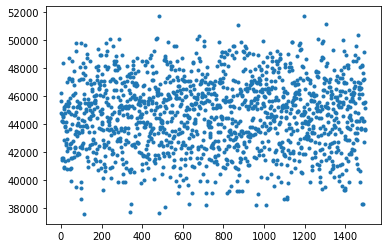

In [15]:
plt.plot(y_pred,".")

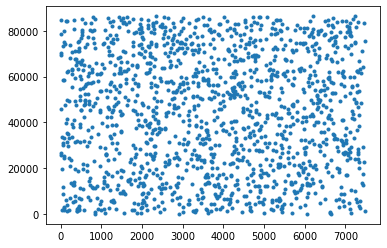

In [16]:
plt.plot(y_test,".")

<function matplotlib.pyplot.show(*args, **kw)>

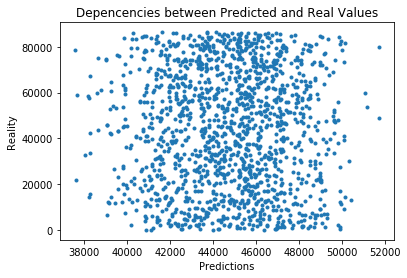

In [17]:
plt.plot(y_pred, y_test,".")
plt.title("Depencencies between Predicted and Real Values")
plt.xlabel("Predictions")
plt.ylabel("Reality")
plt.show